In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [112]:
df = pd.read_csv('heart.xls')

In [113]:
x=df.dropna()

In [114]:
x=pd.DataFrame(x)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [115]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [116]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [117]:
corr= x.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [118]:
corr['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


In [119]:
x['cp'].min(),x['cp'].max()

(0, 3)

In [120]:
x['cp'].value_counts().sort_index()

,count
cp,
0,497
1,167
2,284
3,77


In [121]:
x['cp'].value_counts().sort_index()/len(x)

,count
cp,
0,0.484878
1,0.162927
2,0.277073
3,0.075122


In [122]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(x, x['cp']):
    strat_train_set= x.iloc[train_index]
    strat_test_set= x.iloc[test_index]

In [123]:
strat_train_set['cp'].value_counts().sort_index()/len(strat_train_set)

,count
cp,
0,0.484146
1,0.163415
2,0.276829
3,0.075610


In [124]:
X_train= strat_train_set.drop('target', axis=1)
y_train= strat_train_set['target'].copy()
X_test= strat_test_set.drop('target', axis=1)
y_test= strat_test_set['target'].copy()

In [125]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
regressor=LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print("1st")
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df1)

1st
     Actual  Predicted
334       0          0
504       0          1
642       1          0
102       1          1
355       1          1
..      ...        ...
954       1          1
145       0          0
757       1          0
340       1          1
491       1          1

[205 rows x 2 columns]


In [127]:
accuracy_score(y_test,y_pred)

0.8585365853658536

In [128]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_predclass=classifier.predict(X_test)
print("2nd")
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_predclass})
df2

2nd


,Actual,Predicted
334,0,0
504,0,0
642,1,1
102,1,1
355,1,1
...,...,...
954,1,1
145,0,0
757,1,1
340,1,1


In [129]:
accuracy_score(y_test,y_predclass)

1.0

In [130]:
svm=SVC()
svm.fit(X_train,y_train)
y_predsvm=svm.predict(X_test)
print("3rd")
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_predsvm})
df3

3rd


,Actual,Predicted
334,0,0
504,0,1
642,1,0
102,1,1
355,1,1
...,...,...
954,1,1
145,0,0
757,1,1
340,1,1


In [131]:
accuracy_score(y_test,y_predsvm)

0.8975609756097561

In [132]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(400, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 300)                 │          30,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,101 (1.35 MB)

 Trainable params: 353,101 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
checkpoint_cb= tf.keras.callbacks.ModelCheckpoint('my_keras_model.keras', save_best_only=True)

In [134]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [135]:
history=model.fit(X_train, y_train, epochs=30, validation_split=0.2,verbose=1,callbacks=[checkpoint_cb])

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - Precision: 0.6931 - Recall: 0.6044 - accuracy: 0.6784 - loss: 0.5474 - val_Precision: 0.8235 - val_Recall: 0.9545 - val_accuracy: 0.8659 - val_loss: 0.3426
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Precision: 0.8741 - Recall: 0.9325 - accuracy: 0.8925 - loss: 0.2644 - val_Precision: 0.9506 - val_Recall: 0.8750 - val_accuracy: 0.9085 - val_loss: 0.2420
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Precision: 0.9512 - Recall: 0.9432 - accuracy: 0.9474 - loss: 0.1694 - val_Precision: 0.9540 - val_Recall: 0.9432 - val_accuracy: 0.9451 - val_loss: 0.1597
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.9732 - Recall: 0.9806 - accuracy: 0.9767 - loss: 0.0896 - val_Precision: 0.8286 - val_Recall: 0.9886 - val_accuracy: 0.8841 - val_loss: 0.2892
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - Precision: 0.9419 - Recall: 0.9775 - accuracy: 0.9574 - loss: 0.0930 - val_Precision: 0.9770 - val_Recall: 0.965

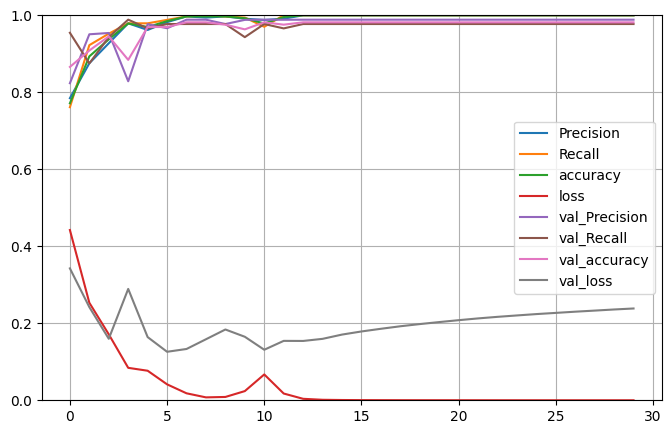

In [136]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [137]:
best_model= tf.keras.models.load_model('my_keras_model.keras')

In [138]:
best_model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.9418 - Recall: 0.9900 - accuracy: 0.9651 - loss: 0.2329  


[0.1903751790523529,
 0.9658536314964294,
 0.9444444179534912,
 0.9902912378311157]

In [139]:
y_preddl=(best_model.predict(X_test)>0.5).astype("int32")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [140]:
pd.DataFrame(y_preddl[:5])

,0
0,0
1,0
2,1
3,1
4,1


In [141]:
y_test[:5]

,target
334,0
504,0
642,1
102,1
355,1


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preddl))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       102
           1       0.94      0.99      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

